In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

%matplotlib notebook

In [2]:
# Loading dataset
digits = datasets.load_digits()
print("Loaded digits dataset")
print("Total input data:", digits.data.shape[0], "items of size", digits.data.shape[1], "- Shape:", digits.data.shape)
print("Output shape", digits.target.shape)

Loaded digits dataset
Total input data: 1797 items of size 64 - Shape: (1797, 64)
Output shape (1797,)


In [3]:
# Splitting dataset
n = round(digits.data.shape[0] * 0.85)
print("Training items:", n)
print("Testing items:", digits.data.shape[0] - n)
x_train = digits.data[:n]
y_train = digits.target[:n]
x_test = digits.data[n:]
y_test = digits.target[n:]

Training items: 1527
Testing items: 270


# SVM
Classification of handwritten digits using scikit SVM

In [4]:
from sklearn import svm

In [8]:
def display_digits(data):
    """
    Function to display digits using matplotlib.
    
    Parameters
    ----------
    data: ndarray(ndim=2)
        shape (M, 64) - M being the number of data items and digits displayed
    """
    rows = int(np.ceil(data.shape[0] / 5))
    f, axs = plt.subplots(rows, 5, figsize=(9, rows * 2 - 1))
    for i in range(data.shape[0]):
        if rows == 1:
            plt.axes(axs[i])
        else:
            plt.axes(axs[i//5, i%5])
        plt.imshow(data[i].reshape((8,8)), cmap='Greys')

In [9]:
clf = svm.SVC(gamma=0.001, C=100.0) # Create classifier
clf.fit(x_train, y_train) # Fit classifier
print("Classifier score:", clf.score(x_test, y_test))

Classifier score: 0.948148148148


<IPython.core.display.Javascript object>


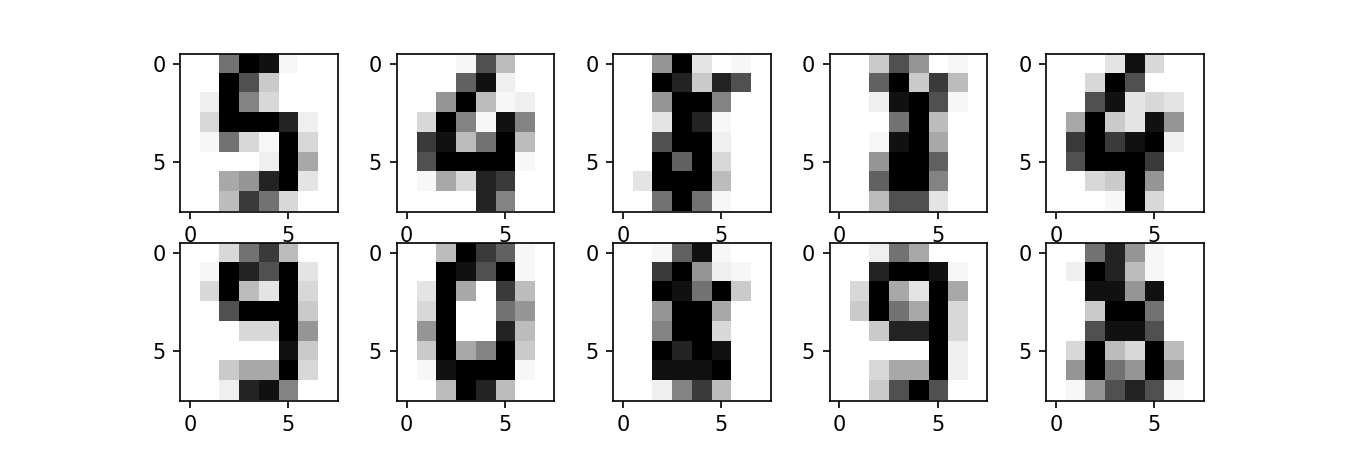

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [12]:
display_digits(x_test[-10:])
clf.predict(x_test[-10:])

# NN
Classification of handwritten digits using Keras's NN

In [13]:
# Imports
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

Using TensorFlow backend.


In [97]:
model = Sequential() # Create sequential model
# Add layers
model.add(Dense(40, input_dim=64)) # 32 units
model.add(Activation('relu')) # __/ --> zeros out negative values
model.add(Dense(10))
model.add(Activation('softmax')) # normalizes final results to probability distribution
model.compile(loss='categorical_crossentropy', # See notebook
             optimizer='sgd', # Stochastic gradient descent
             metrics=['accuracy'])

In [98]:
one_hot = to_categorical(y_train, num_classes=10)
# Converts labels to one-hot encoding
model.fit(x_train, one_hot, epochs = 10, validation_split=0.2)

Train on 1221 samples, validate on 306 samples
Epoch 1/10
1221/1221 [==============================] - 0s - loss: 2.3080 - acc: 0.5471 - val_loss: 0.7263 - val_acc: 0.7582
Epoch 2/10
1221/1221 [==============================] - 0s - loss: 0.5257 - acc: 0.8436 - val_loss: 0.8100 - val_acc: 0.7810
Epoch 3/10
1221/1221 [==============================] - 0s - loss: 0.3169 - acc: 0.9050 - val_loss: 0.5576 - val_acc: 0.8399
Epoch 4/10
1221/1221 [==============================] - 0s - loss: 0.2449 - acc: 0.9230 - val_loss: 0.8044 - val_acc: 0.7745
Epoch 5/10
1221/1221 [==============================] - 0s - loss: 0.1972 - acc: 0.9386 - val_loss: 0.3287 - val_acc: 0.8954
Epoch 6/10
1221/1221 [==============================] - 0s - loss: 0.1453 - acc: 0.9541 - val_loss: 0.4312 - val_acc: 0.8627
Epoch 7/10
1221/1221 [==============================] - 0s - loss: 0.1321 - acc: 0.9533 - val_loss: 0.2880 - val_acc: 0.8987
Epoch 8/10
1221/1221 [==============================] - 0s - loss: 0.1069 - ac

In [102]:
test_one_hot = to_categorical(y_test, num_classes=10)
score, acc = model.evaluate(x_test, test_one_hot)
print()
print("Score:", score)
print("Accuracy:", acc)

 32/270 [==>...........................] - ETA: 0s
Score: 0.546858991075
Accuracy: 0.866666666667


In [100]:
np.argmax(model.predict(x_test), axis=1)

array([7, 2, 5, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 0, 0, 9, 9, 8, 0, 1, 2, 3, 4,
       5, 1, 8, 1, 9, 6, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 7,
       6, 9, 5, 5, 6, 5, 0, 9, 4, 5, 8, 4, 1, 7, 7, 1, 5, 1, 6, 0, 0, 2, 7,
       8, 2, 6, 1, 2, 6, 1, 3, 7, 7, 3, 4, 6, 6, 6, 8, 9, 1, 5, 6, 9, 5, 2,
       8, 0, 1, 7, 6, 3, 2, 1, 7, 8, 6, 3, 1, 3, 1, 1, 7, 6, 8, 4, 3, 1, 4,
       0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 8, 4, 5, 0, 1,
       1, 7, 0, 1, 2, 3, 8, 5, 6, 7, 8, 9, 0, 1, 2, 8, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 8, 8, 7, 5, 3, 4, 6, 6,
       6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3,
       1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 6, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8], dtype=int64)